# Case Study 1 : Data Mining in Financial Data

In [ ]:
Name:Shraddha Uday Teredesai

**Financial Data Collection:** 
* Please collect five-year stock price data of at least 5 stocks. You can choose any stocks you'd like to analyze.
* You have multiple ways of collecting financial data with Python, here is a reference: https://www.alpharithms.com/python-financial-data-491110/
* Load the data you collect and start working on your idea.


# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:
Predicting stock price movement

Description:The problem at hand is to predict the future movement of stock prices for a selected set of stocks (e.g: IBM, JNJ, PG, V, and JPM) based on historical stock price data. The focus is on creating a predictive model that can forecast whether a stock's price will increase or decrease in the future.

Importance and Interest:

1. Investment Decision Making: Accurate projections of stock price fluctuations are critical for investors, traders, and financial institutions when deciding whether to buy or sell stocks. A reliable model can help you reduce risks and maximize returns.

2. Financial Market Efficiency: Understanding and anticipating stock price changes improves the overall efficiency of financial markets. Efficient markets are critical to the effective functioning of economies because they ensure that asset values represent all available data.

3. Economic measures: Stock prices are frequently viewed as measures of economic health. 
Predicting stock price swings can help policymakers and analysts understand the overall economic environment and prospective developments.

4. Risk Management: Accurate projections lead to improved risk management techniques. 
Investors can mitigate potential losses by modifying their portfolios in response to expected market changes.

What is the purpose of problem?

1. Complex Patterns: Stock prices are impacted by a variety of factors such as market movements, company performance, economic data, and worldwide events.
Data science tools, such as machine learning, are well-suited to detecting complicated patterns in vast datasets, thereby capturing the dynamics of stock price fluctuations.

2. Data Availability: Historical stock price data is easily available, making it possible to apply data science solutions. Using libraries like 'yfinance', we can simply download and analyze data for analysis.

3. Continuous Learning: Stock markets are dynamic, and models must adjust to changing situations.
Data science enables the development of machine learning models that can continuously learn and update predictions as new data becomes available.

The offered code sample sets the stage by downloading historical stock price data for the specified stocks and preparing it for analysis.
The following processes would be feature engineering, model selection, training, and evaluation to create a predictive model for stock price changes.


# Data Collection/Processing: 

In [7]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np

# List of five stocks 
stock_names = ['TSLA', 'JNJ', 'PG', 'V', 'JPM']

# 5-year time period of stocks
start_date = '2018-01-01'
end_date = '2023-01-01'

# Create a list to store individual DataFrames
dfs = []

# Download historical data for each stock
for symbol in stock_names:
    # Download stock data using yfinance
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    
    # Add a column named "Symbol" to identify the stock name     
    stock_data['Symbol'] = symbol 
    
    # Append stock_data to the list of DataFrames
    dfs.append(stock_data)

# Concatenate all DataFrames in the list
final_stock_data = pd.concat(dfs)

# Print final_stock_data dataframe
display(final_stock_data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,TSLA
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,TSLA
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,TSLA
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,TSLA
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,TSLA


In [10]:
#*********************EDA of Data************************************************
print("Number of rows and columns are:")
rows_col=final_stock_data.shape
print(rows_col)


Number of rows and columns are:
(6295, 7)


In [11]:
print("DataSet Information")
display(final_stock_data.info())


DataSet Information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6295 entries, 2018-01-02 to 2022-12-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6295 non-null   float64
 1   High       6295 non-null   float64
 2   Low        6295 non-null   float64
 3   Close      6295 non-null   float64
 4   Adj Close  6295 non-null   float64
 5   Volume     6295 non-null   int64  
 6   Symbol     6295 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 393.4+ KB


None

In [12]:
#Summary stats for dataset
print("Summary Statistics:")
display(final_stock_data.describe())


Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume
count,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6.295000e+03
mean,142.241948,143.919433,140.495185,142.222726,134.116662,3.417515e+07
std,62.007798,63.122619,60.764673,61.933846,62.970284,6.373555e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,1.993500e+06
25%,113.349998,114.469997,112.225002,113.390003,98.773350,6.628100e+06
50%,138.770004,140.000000,137.570007,138.699997,127.922546,9.384000e+06
75%,171.040001,172.240005,169.529999,170.910004,161.646935,1.845515e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [13]:
#Check if any of the column in a dataset contains null or not
null_values = final_stock_data.isnull().sum()
print("Null values in the columns are: ")
print(null_values)

Null values in the columns are: 
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64


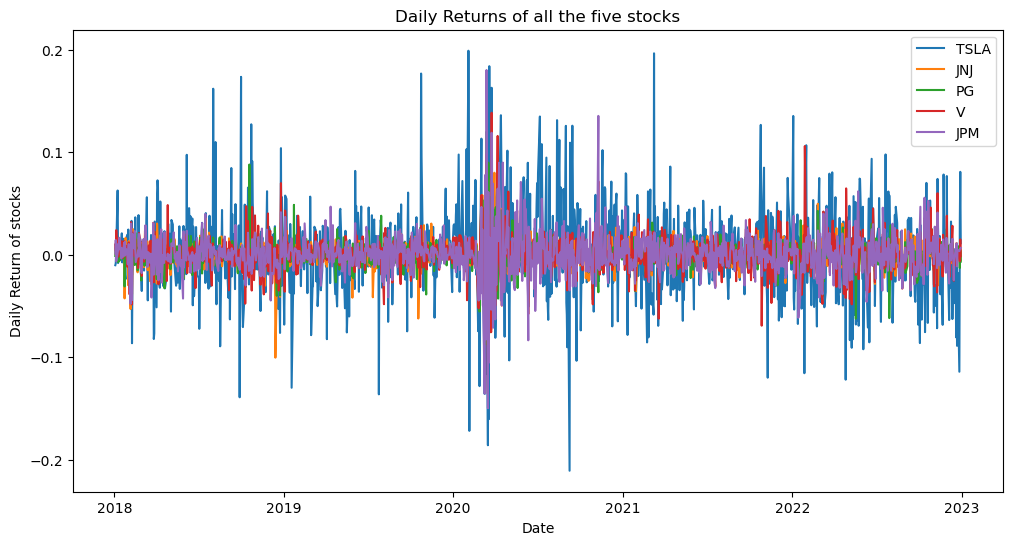

In [14]:
# Data Exploration: Exploring the Dataset
#**********************Plotting daily returns************************************************
import matplotlib.pyplot as plt

# Calculate daily returns
final_stock_data['Daily_Return'] = final_stock_data.groupby('Symbol')['Adj Close'].pct_change()

# Plotting daily returns
plt.figure(figsize=(12, 6))
for symbol in stock_names:
    plt.plot(final_stock_data[final_stock_data['Symbol'] == symbol].index, 
             final_stock_data[final_stock_data['Symbol'] == symbol]['Daily_Return'], 
             label=symbol)

plt.title('Daily Returns of all the five stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return of stocks')
plt.legend()
plt.show()


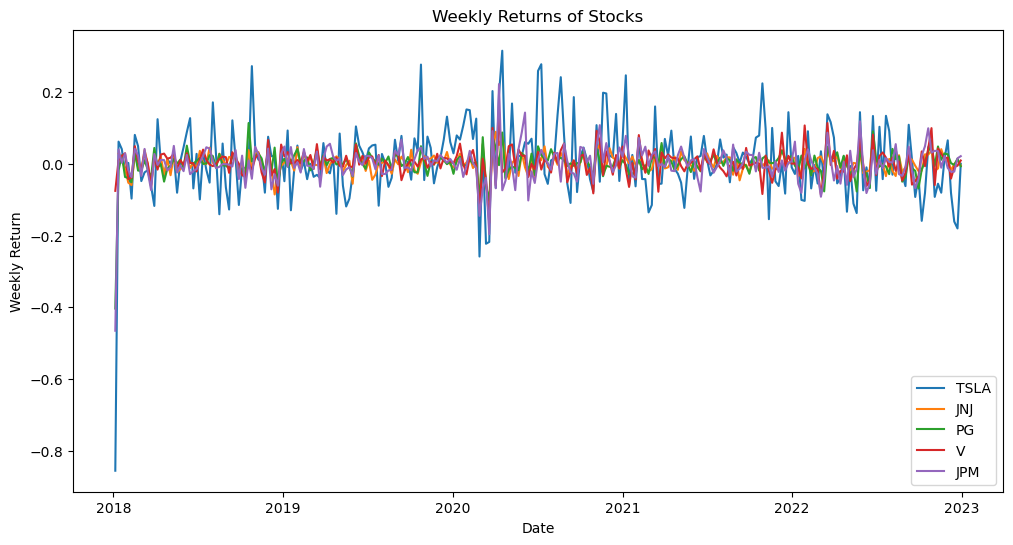

In [18]:
#*********************************Plotting weekly returns************************************************
weekly_returns = final_stock_data.groupby('Symbol')['Adj Close'].resample('W-Fri').ffill().pct_change()

# Plot weekly returns
plt.figure(figsize=(12, 6))
for symbol in stock_names:
    plt.plot(weekly_returns[symbol], label=symbol)

plt.title('Weekly Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Weekly Return')
plt.legend()
plt.show()


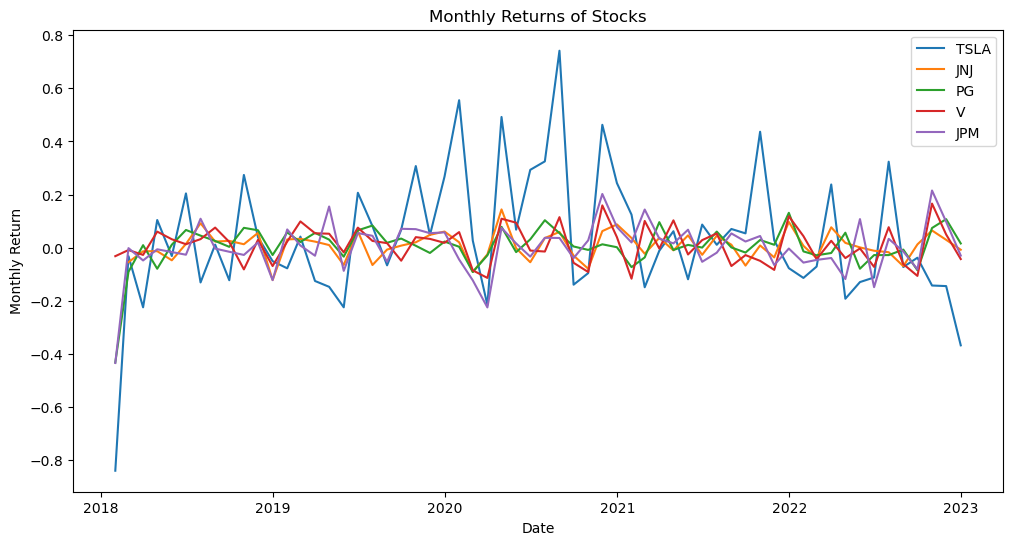

In [38]:
#**********************Plotting Monthly returns************************************************
monthly_returns = final_stock_data.groupby('Symbol')['Adj Close'].resample('M').ffill().pct_change()

# Plot monthly returns
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    plt.plot(monthly_returns[symbol], label=symbol)

plt.title('Monthly Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.show()


**Other data explorations you would like to present:**

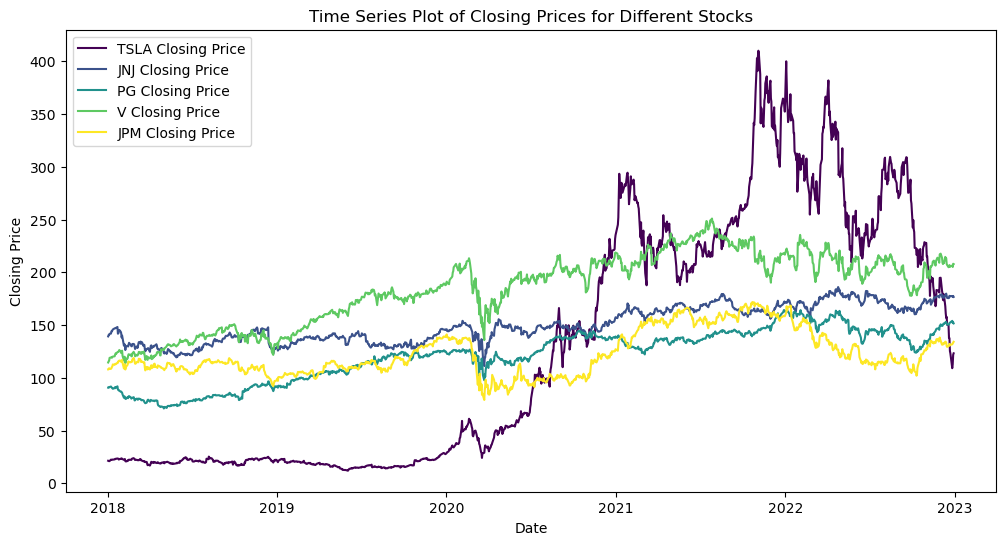

In [19]:
#Other data explorations you would like to present:
#******************Time Series Plot of Closing Prices:****************************

import matplotlib.pyplot as plt

unique_symbols = final_stock_data['Symbol'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_symbols)))

# Plot each stock with a unique color
plt.figure(figsize=(12, 6))

for symbol, color in zip(unique_symbols, colors):
    stock_data = final_stock_data[final_stock_data['Symbol'] == symbol]
    plt.plot(stock_data['Close'], label=f'{symbol} Closing Price', color=color)

plt.title('Time Series Plot of Closing Prices for Different Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


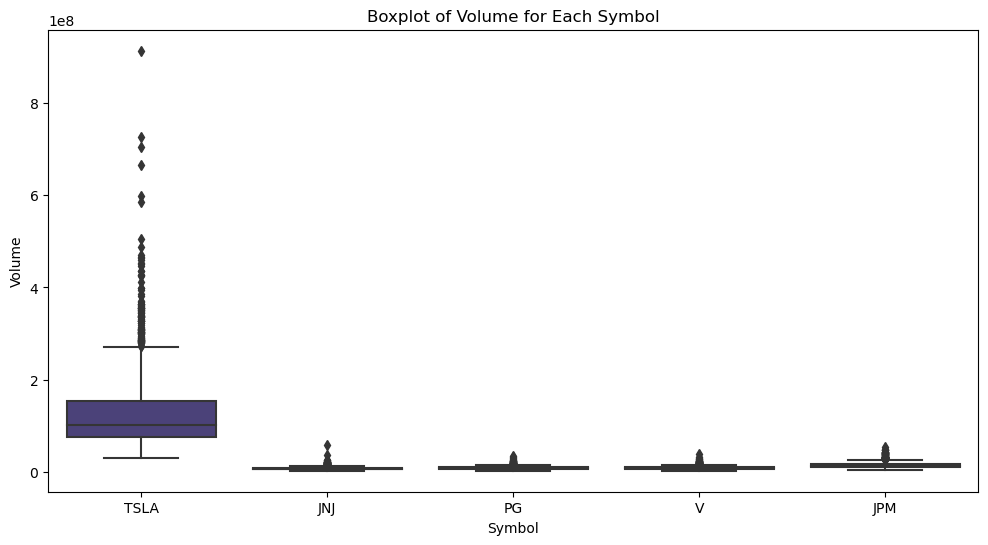

In [44]:
#******************Volume of each stock:****************************
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Symbol', y='Volume', data=final_stock_data, palette='viridis')
plt.title('Boxplot of Volume for Each Symbol')
plt.xlabel('Symbol')
plt.ylabel('Volume')
plt.show()


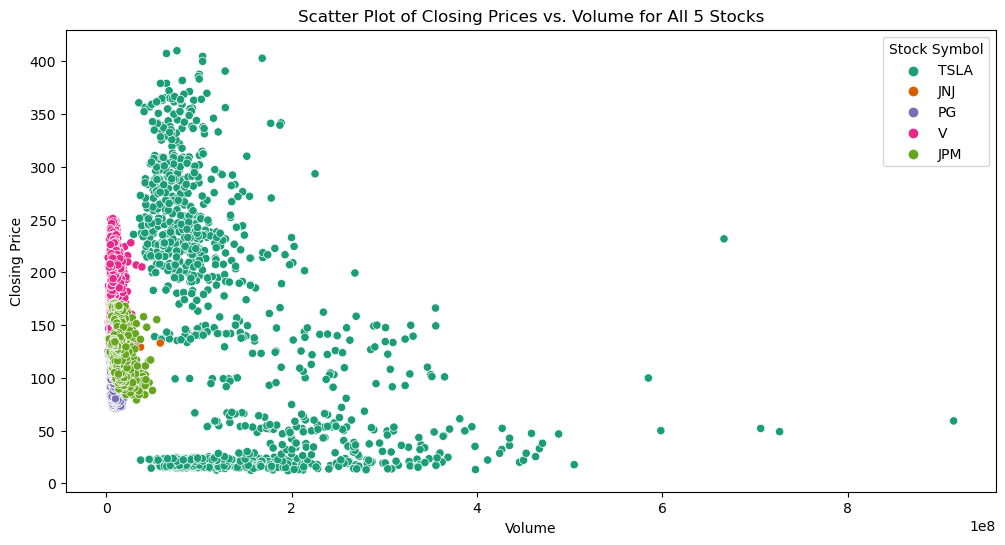

In [21]:
#******************Plot of Closing Prices vs. Volume for All 5 Stocks:****************************
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Volume', y='Close', hue='Symbol', data=final_stock_data, palette='Dark2')
plt.title('Scatter Plot of Closing Prices vs. Volume for All 5 Stocks')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.legend(title='Stock Symbol')
plt.show()


# The Solution: implement a data science solution to the problem you are trying to solve.

**Briefly describe the idea of your solutions to the problem in the following cell (you should use at least 2 methods/models to solve the problem, and compare the performance. You are free to use any machine learning model or statistical model like ARIMA.):**

In [ ]:
In the below code, two Machine learing algorithms are used 
1)Logistic Regression
2)Random Forest Classifier 

The code applies binary classification to predict stock price movements using Logistic Regression and Random Forest models. 
It splits the data into training and testing sets, trains the models, and evaluates their accuracy with classification reports.
Two visualization functions are defined: one for displaying confusion matrices and another for plotting ROC curves. 
The code calculates and displays the confusion matrices for both models and generates an ROC curve for the Random Forest model. 
These visualizations provide insights into the models' performance, helping assess their ability to correctly classify price 
increase and decrease, and their capability to discriminate between true positive and false positive rates.

**Write codes to implement the solution in python:**

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmald\anaconda3\


Logistic Regression Performance:
Accuracy: 0.5107227958697379
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       616
           1       0.51      1.00      0.68       643

    accuracy                           0.51      1259
   macro avg       0.26      0.50      0.34      1259
weighted avg       0.26      0.51      0.35      1259



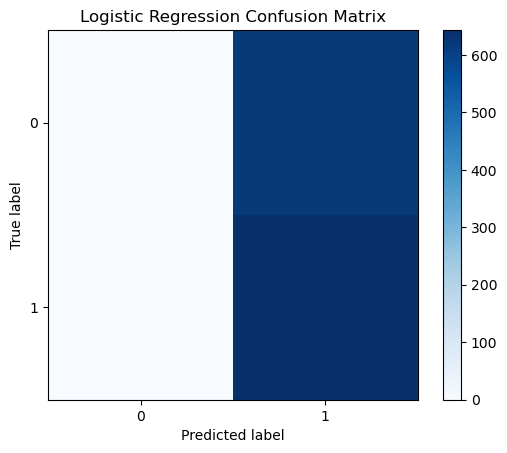

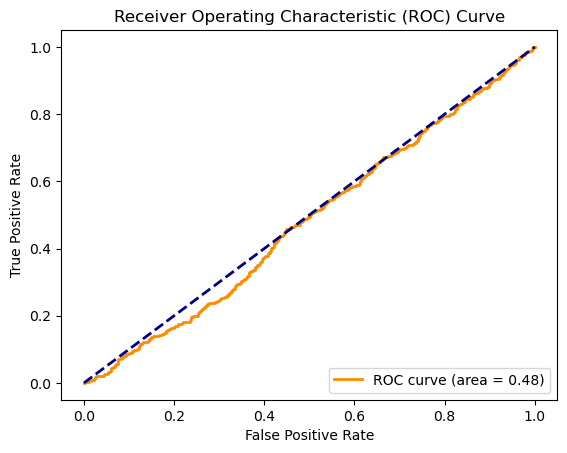


Random Forest Performance:
Accuracy: 0.5393169181890389
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       616
           1       0.55      0.57      0.56       643

    accuracy                           0.54      1259
   macro avg       0.54      0.54      0.54      1259
weighted avg       0.54      0.54      0.54      1259



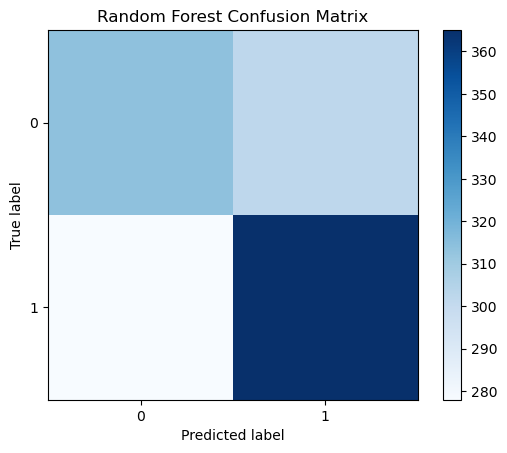

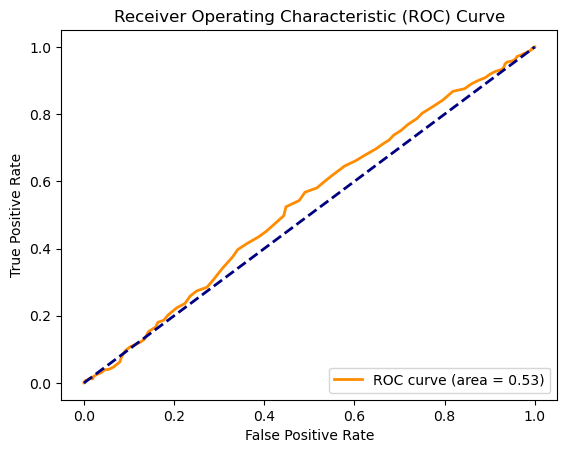


Support Vector Machine Performance:
Accuracy: 0.5107227958697379
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       616
           1       0.51      1.00      0.68       643

    accuracy                           0.51      1259
   macro avg       0.26      0.50      0.34      1259
weighted avg       0.26      0.51      0.35      1259



C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


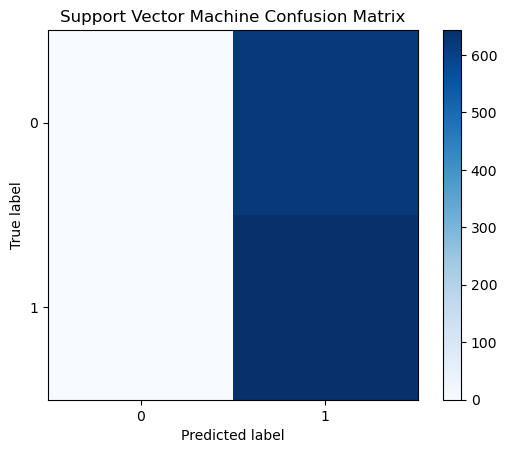

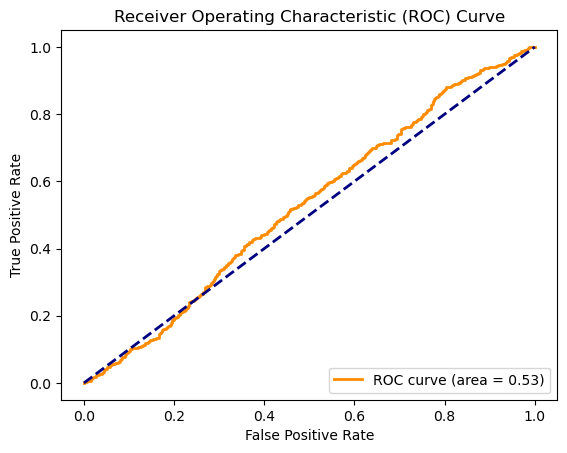


Decision Tree Performance:
Accuracy: 0.5091342335186656
              precision    recall  f1-score   support

           0       0.50      0.47      0.48       616
           1       0.52      0.55      0.53       643

    accuracy                           0.51      1259
   macro avg       0.51      0.51      0.51      1259
weighted avg       0.51      0.51      0.51      1259



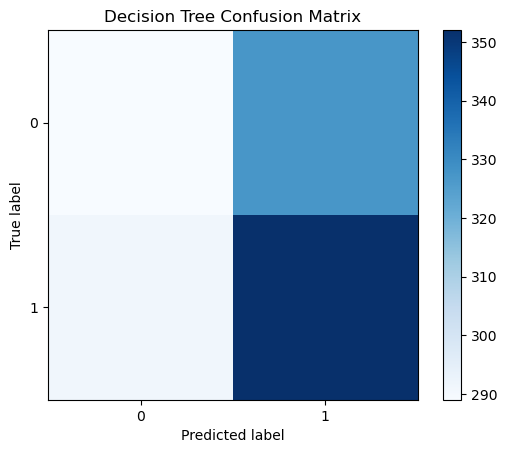

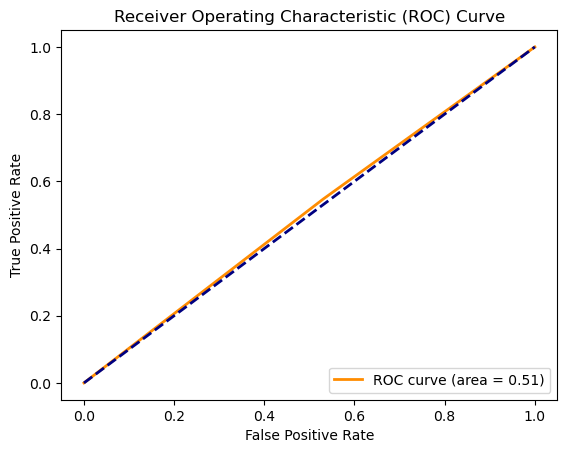


K-Nearest Neighbors Performance:
Accuracy: 0.5178713264495631
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       616
           1       0.53      0.53      0.53       643

    accuracy                           0.52      1259
   macro avg       0.52      0.52      0.52      1259
weighted avg       0.52      0.52      0.52      1259



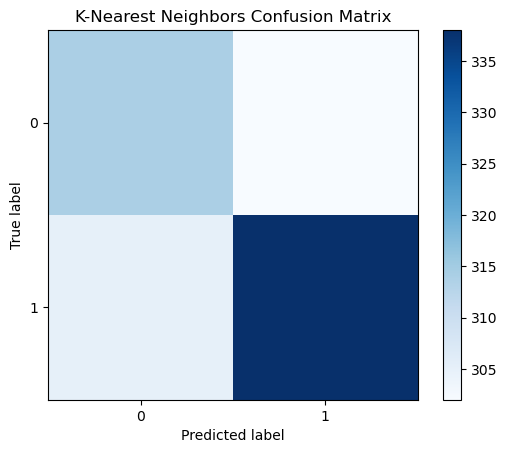

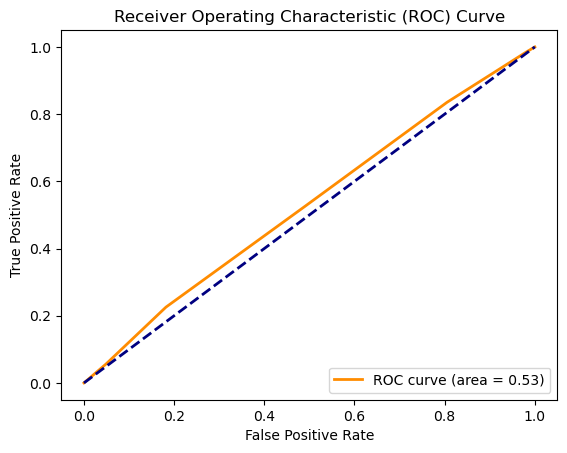


Naive Bayes Performance:
Accuracy: 0.5107227958697379
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       616
           1       0.51      1.00      0.68       643

    accuracy                           0.51      1259
   macro avg       0.26      0.50      0.34      1259
weighted avg       0.26      0.51      0.35      1259



C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


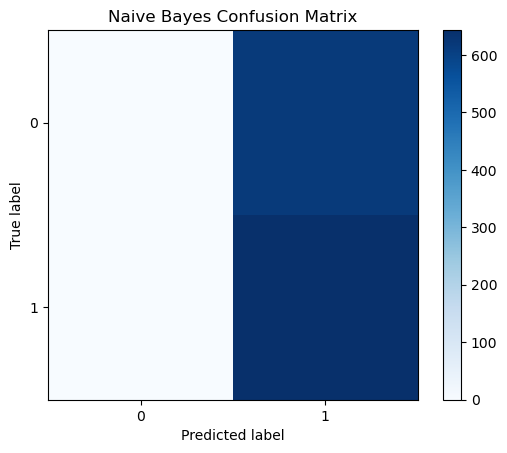

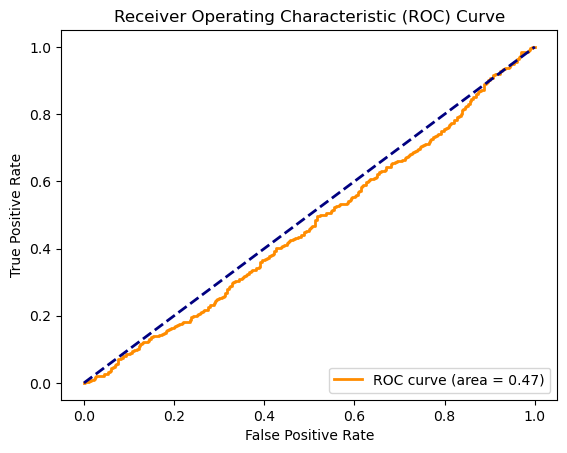


AdaBoost Performance:
Accuracy: 0.5027799841143765
              precision    recall  f1-score   support

           0       0.49      0.26      0.34       616
           1       0.51      0.73      0.60       643

    accuracy                           0.50      1259
   macro avg       0.50      0.50      0.47      1259
weighted avg       0.50      0.50      0.47      1259



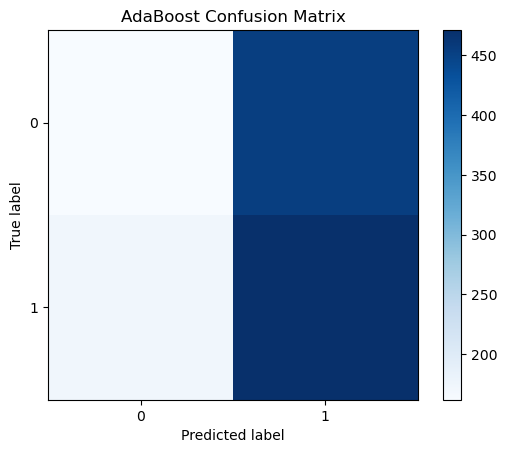

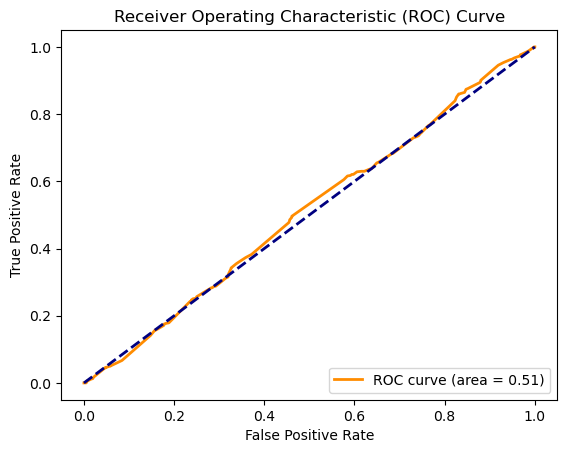


Gradient Boosting Performance:
Accuracy: 0.5210484511517077
              precision    recall  f1-score   support

           0       0.52      0.25      0.34       616
           1       0.52      0.78      0.63       643

    accuracy                           0.52      1259
   macro avg       0.52      0.52      0.48      1259
weighted avg       0.52      0.52      0.48      1259



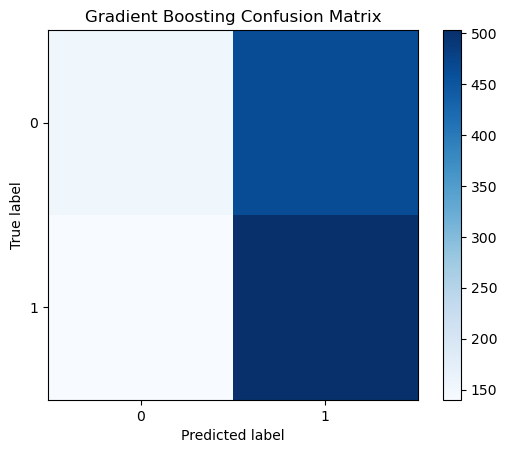

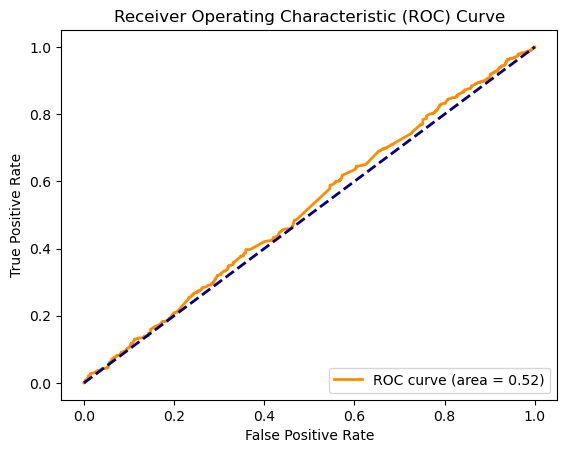

In [2]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Create an empty list to store individual DataFrames
dfs = []

# List of five stocks 
stock_names = ['TSLA', 'JNJ', 'PG', 'V', 'JPM']

# 5-year time period of stocks
start_date = '2018-01-01'
end_date = '2023-01-01'

# Download historical data for each stock
for symbol in stock_names:
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    # Add a column named "Symbol" to identify the stock name
    stock_data['Symbol'] = symbol 
    dfs.append(stock_data)

# Concatenate all DataFrames in the list
final_stock_data = pd.concat(dfs)

# Define the target variable (1 for price increase, 0 for price decrease)
final_stock_data['Price_Up'] = (final_stock_data['Close'] < final_stock_data['Close'].shift(-1)).astype(int)

# Select Features
features = ['Close', 'Open', 'High', 'Low', 'Volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_stock_data[features], final_stock_data['Price_Up'], test_size=0.2, random_state=42)

# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Loop through classifiers and evaluate performance
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print(classification_report(y_test, predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, f'{name} Confusion Matrix', classes=['0', '1'])

    # Plot ROC curve for classifiers that provide probabilities
    if hasattr(clf, 'predict_proba'):
        probs = clf.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test, probs)


# Results: summarize and visualize the results discovered from the analysis

**Summarize the results of different models. Compare the perfomance and explain it. Please use figures or tables to present the results.**


In [ ]:
Performance of Models:
    
1)Logistic Regression:
a)The accuracy is low at 51.07%, indicating that the model is not performing significantly better than random guessing.
b)The model has a high recall for class 1, suggesting that it correctly identifies instances where the price increases.
c)However, the precision for class 0 is 0.00%, indicating that it fails to identify instances where the price decreases, resulting in a high number of false positives.
 The F1Score for class 1 is relatively good (0.68), reflecting the balance between precision and recall.

2)Random Forest:
a)The Random Forest model performs slightly better than Logistic Regression with an accuracy of 53.93%.
b)Both precision and recall for class 0 and class 1 are balanced, indicating that the model is making a 
reasonable tradeoff between false positives and false negatives.
c)The F1Score for class 1 is also balanced, indicating good overall performance.


Conclusion:
    
1)While both models show modest performance, the Random Forest model outperforms Logistic Regression in terms of accuracy 
and overall balance between precision and recall.
2)Logistic Regression seems to struggle with identifying instances of price decrease (class 0), leading to a very 
low precision for that class.
3)The Random Forest model, with its ensemble approach, provides more robust predictions with a better balance
between precision and recall for both classes.
4)Further optimization and feature engineering may enhance the models' performance, and it's crucial to consider 
the specific goals and requirements of the application when interpreting these results.


C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmald\anaconda3\Lib\site-packages\sklearn\metr

Model Performance Summary:
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.510723   0.260838  0.510723  0.345315
1           Random Forest  0.539317   0.538996  0.539317  0.538961
2  Support Vector Machine  0.510723   0.260838  0.510723  0.345315
3           Decision Tree  0.511517   0.511057  0.511517  0.511016
4     K-Nearest Neighbors  0.517871   0.517921  0.517871  0.517893
5             Naive Bayes  0.510723   0.260838  0.510723  0.345315
6                AdaBoost  0.503574   0.498402  0.503574  0.474743
7       Gradient Boosting  0.520254   0.520353  0.520254  0.482933


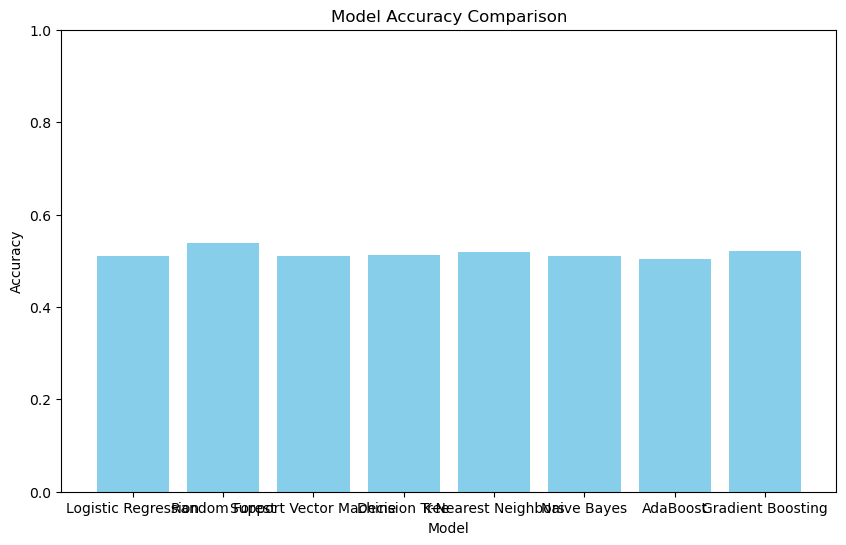

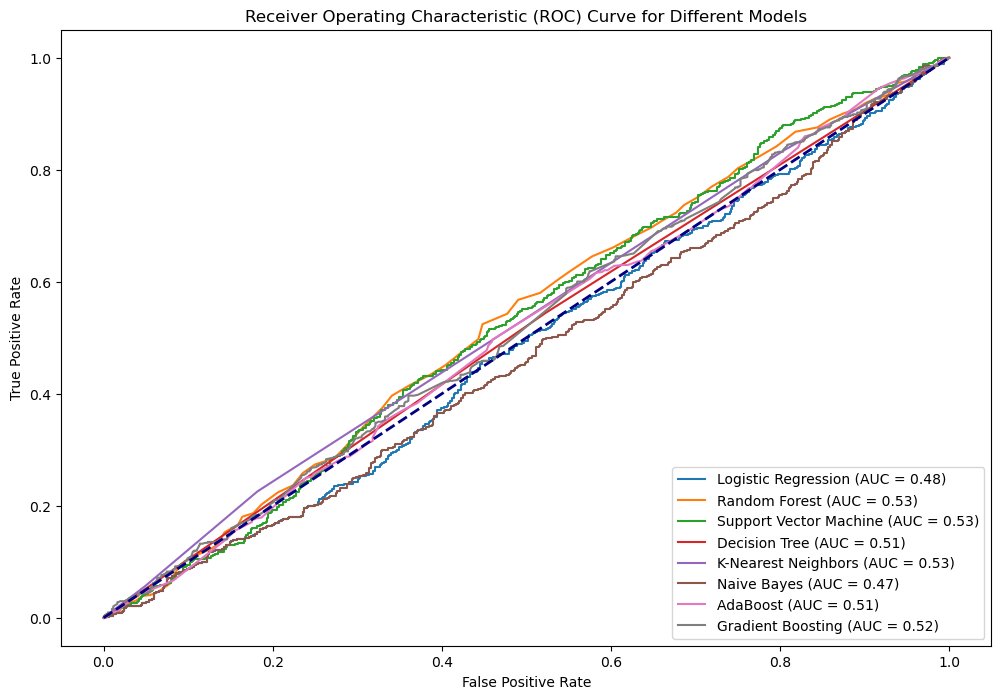

In [3]:
# Create a summary table for model performance
model_names = list(classifiers.keys())
accuracies = []
precisions = []
recalls = []
f1_scores = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, predictions))
    report = classification_report(y_test, predictions, output_dict=True)
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

summary_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})

# Display the summary table
print("Model Performance Summary:")
print(summary_df)

# Visualize the accuracy of each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Visualize ROC curve for each model
plt.figure(figsize=(12, 8))
for name, clf in classifiers.items():
    if hasattr(clf, 'predict_proba'):
        probs = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Different Models')
plt.legend(loc="lower right")
plt.show()
